In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

# Data Preprocessing

In [6]:
# Load the dataset from a CSV file
df = pd.read_csv('C:/Users/mahi/Documents/iris_flower/IRIS.csv')

# Display the first few rows of the dataset
display(df.head())

# Display summary statistics
display(df.describe())

# Check for missing values
print(df.isnull().sum())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
# Encode the target labels
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [8]:
# Split the data into features and target
X = df.drop('species', axis=1)
y = df['species']

# Feature Engineering

In [9]:
# Feature Engineering: Create new features
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28


# Data Visualization

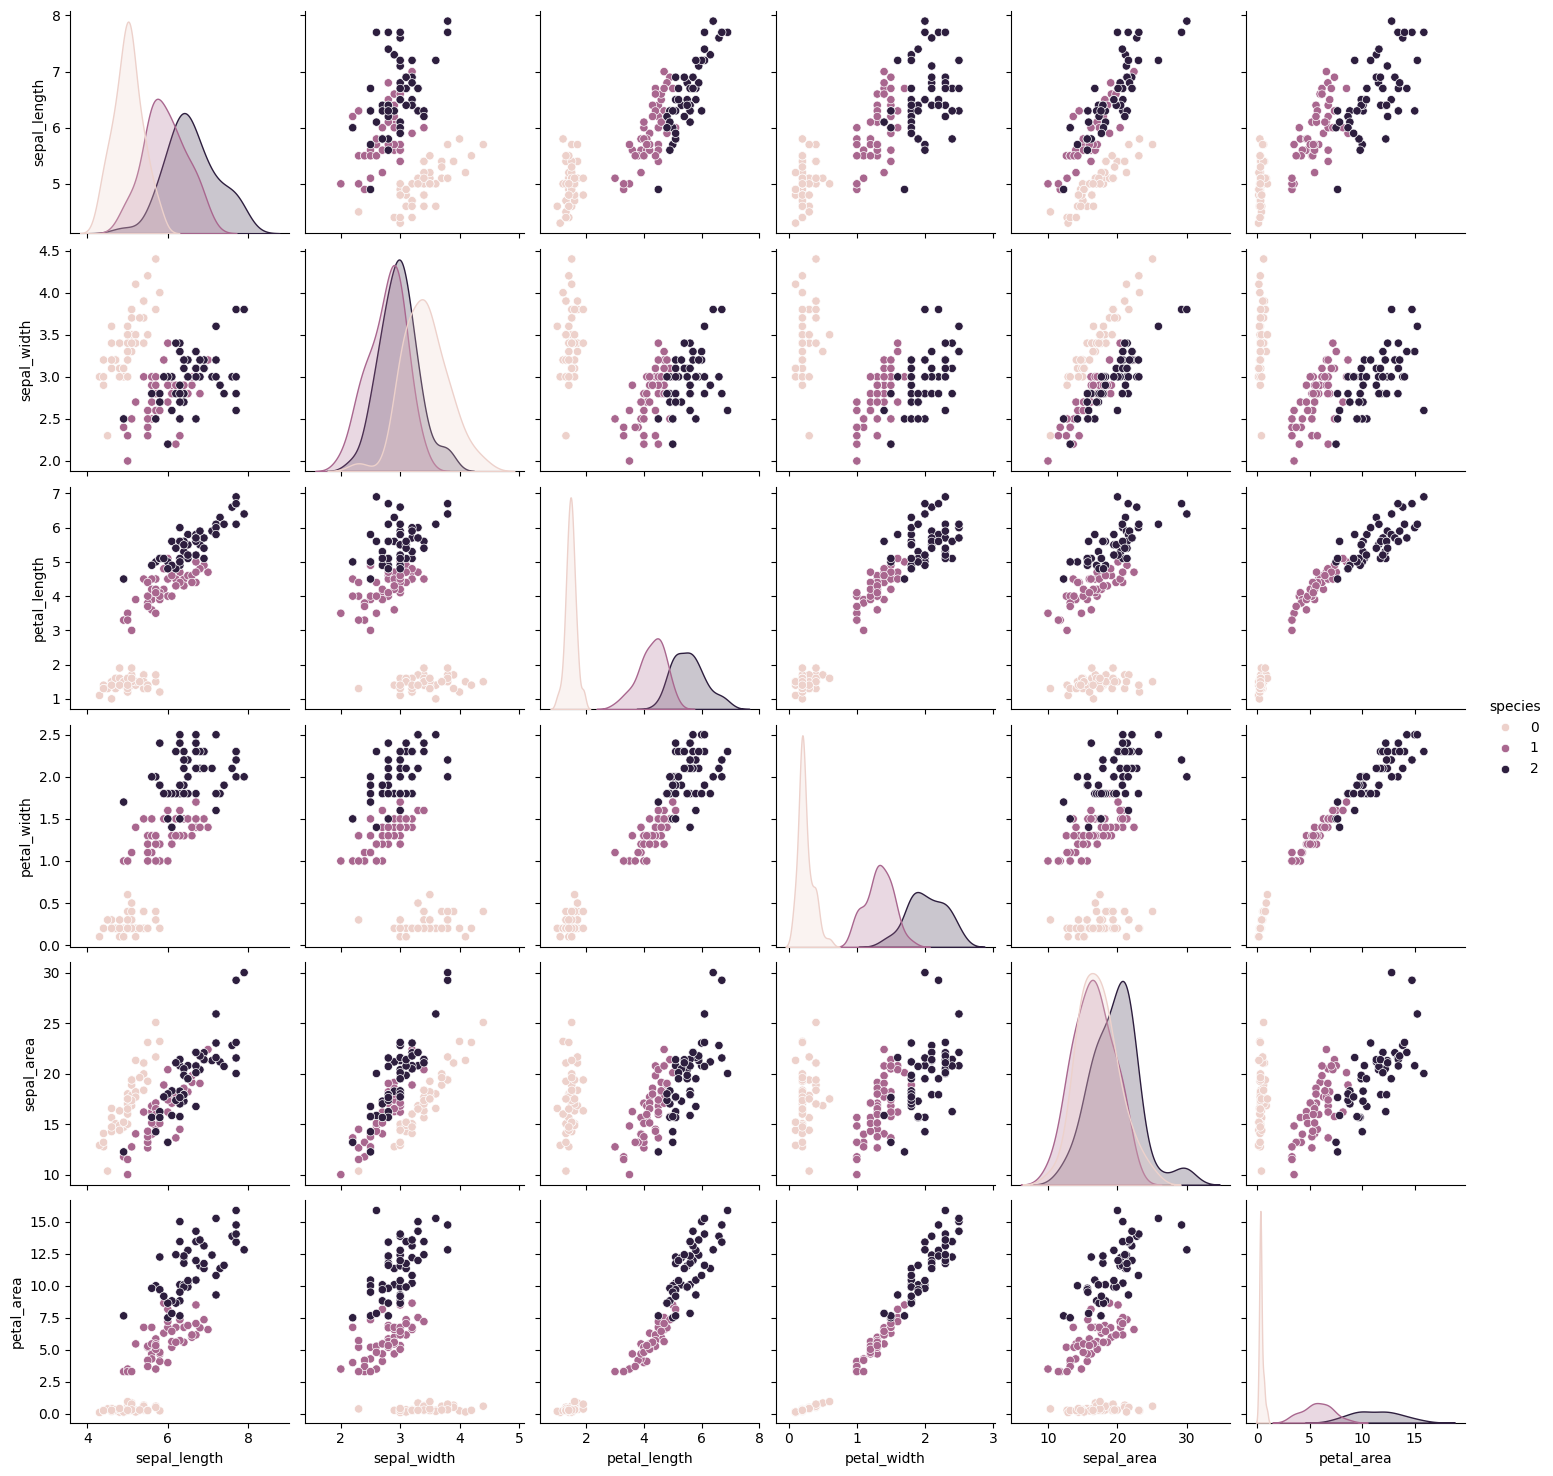

In [10]:
# Visualize the dataset
sns.pairplot(df, hue='species')
plt.show()

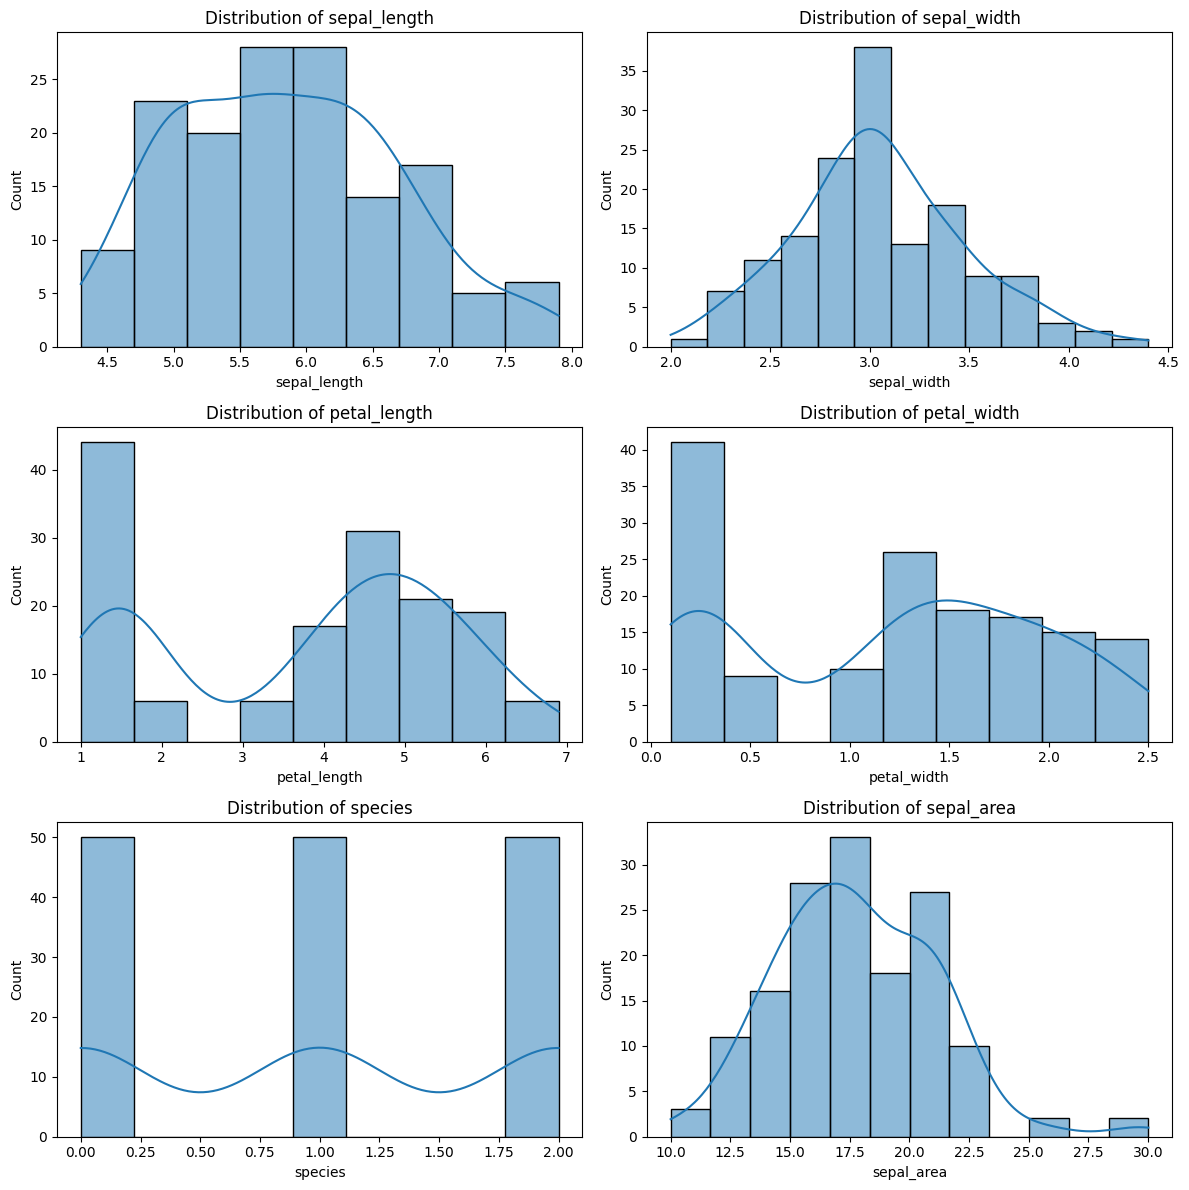

In [11]:
# Visualize the distribution of each feature
num_features = len(df.columns) - 1  # Exclude the target column
num_rows = (num_features + 1) // 2  # Calculate rows needed
num_cols = 2  # We will use 2 columns for the plots

plt.figure(figsize=(12, 4 * num_rows))
for i, column in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Model Training

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


# Model Building

In [13]:
# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix

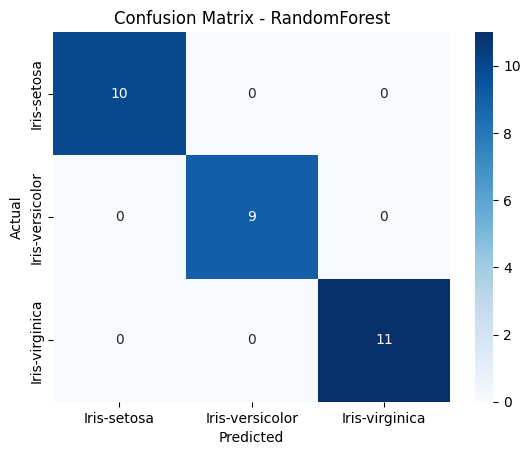

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForest')
plt.show()

In [16]:
# Build the neural network model
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

C:\Users\mahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5285 - loss: 1.1256 - val_accuracy: 0.5000 - val_loss: 1.2738
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6761 - loss: 1.0761 - val_accuracy: 0.5000 - val_loss: 1.0681
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7580 - loss: 0.9656 - val_accuracy: 0.7917 - val_loss: 0.9632
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8264 - loss: 0.8933 - val_accuracy: 1.0000 - val_loss: 0.8992
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9257 - loss: 0.8419 - val_accuracy: 0.7917 - val_loss: 0.8652
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8774 - loss: 0.8048 - val_accuracy: 0.9583 - val_loss: 0.8122
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8930 - loss: 0.7823 - val_accuracy: 1.0000 - val_loss: 0.7522
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9698 - loss: 0.7377 - val_accuracy: 1.0000 - v

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"TensorFlow Model Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9667 - loss: 0.2052
TensorFlow Model Accuracy: 0.9666666388511658


In [20]:
# Predict and evaluate the model
y_pred_tf = model.predict(X_test)
y_pred_classes = y_pred_tf.argmax(axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



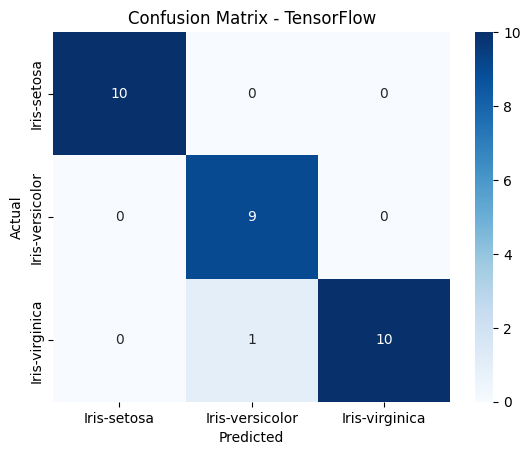

In [21]:
# Plot confusion matrix
cm_tf = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TensorFlow')
plt.show()

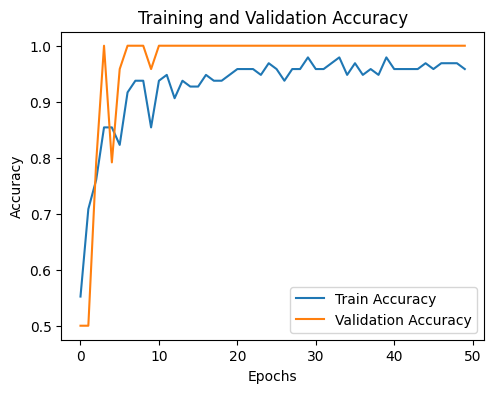

In [22]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

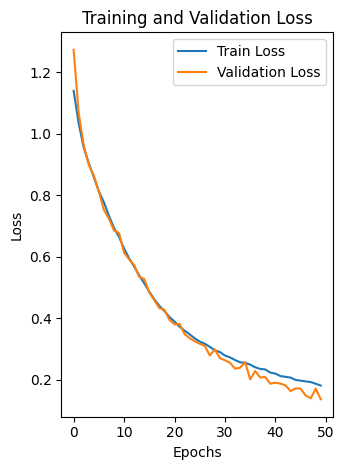

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
import joblib

# Save the model and label encoder
joblib.dump(rf, 'iris_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

# Create the GUI 

In [25]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the trained model and label encoder
model = joblib.load('iris_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

In [26]:
# Function to classify the input flower
def classify_flower():
    try:
        sepal_length = float(entry_sepal_length.get())
        sepal_width = float(entry_sepal_width.get())
        petal_length = float(entry_petal_length.get())
        petal_width = float(entry_petal_width.get())

        # Create the feature array
        features = [[sepal_length, sepal_width, petal_length, petal_width]]

        # Predict the species
        prediction = model.predict(features)
        species = label_encoder.inverse_transform(prediction)[0]

        # Show the result in a messagebox
        messagebox.showinfo('Prediction', f'The predicted species is {species}')
    except ValueError:
        messagebox.showerror('Invalid input', 'Please enter valid numeric values for all fields.')

In [27]:
# Create the GUI
root = tk.Tk()
root.title('Iris Flower Classifier')

# Create input fields
tk.Label(root, text='Sepal Length').grid(row=0)
tk.Label(root, text='Sepal Width').grid(row=1)
tk.Label(root, text='Petal Length').grid(row=2)
tk.Label(root, text='Petal Width').grid(row=3)

entry_sepal_length = tk.Entry(root)
entry_sepal_width = tk.Entry(root)
entry_petal_length = tk.Entry(root)
entry_petal_width = tk.Entry(root)

entry_sepal_length.grid(row=0, column=1)
entry_sepal_width.grid(row=1, column=1)
entry_petal_length.grid(row=2, column=1)
entry_petal_width.grid(row=3, column=1)


In [ ]:
# Create the classify button
button_classify = tk.Button(root, text='Classify', command=classify_flower)
button_classify.grid(row=4, columnspan=2)

# Run the GUI loop
root.mainloop()

C:\Users\mahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
